In [25]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools
import pickle

In [2]:
import pandas as pd
messages=pd.read_csv("C:/Users/harki/Desktop/Analytics/smsspamcollection\SMSSpamCollection", sep='\t',
                           names=["label", "message"])

In [11]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [1]:
corpus = []
stemmer = PorterStemmer()
## removing all the punctuation marks
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [stemmer.stem(word) for word in review if not word in stopwords.words('english')] # remvoing all the stop words
    review = ' '.join(review)
    corpus.append(review)
    


In [10]:
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000) # max_features selectes word with highest counts
X = cv.fit_transform(corpus).toarray()

y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Training model using Naive bayes classifier



In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.985
Confusion matrix, without normalization


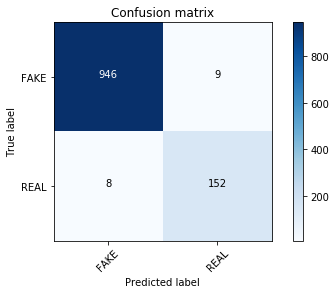

In [23]:
spam_detect_model = MultinomialNB().fit(X_train, y_train)
y_pred=spam_detect_model.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


In [28]:
# Creating a pickle file for the CountVectorizer
pickle.dump(cv, open('cv-transform.pkl', 'wb'))

In [27]:
# Creating a pickle file for the Multinomial Naive Bayes model
filename = 'spam-sms-mnb-model.pkl'
pickle.dump(spam_detect_model, open(filename, 'wb'))